# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle
import cv2


def grayscale(data):
    data_all=[]
    for image in data:
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        image =  np.reshape(image, (32, 32, 1))
        data_all.append(image)
        
    return data_all
    



# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
#X_train = grayscale(X_train)
#X_train =  np.asarray(X_train)
#X_validation = grayscale(X_validation)
#X_validation =  np.asarray(X_validation)
#X_test = grayscale(X_test)
#X_test =  np.asarray(X_test)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

1
Updated Image Shape: (32, 32, 3)
<class 'numpy.ndarray'>


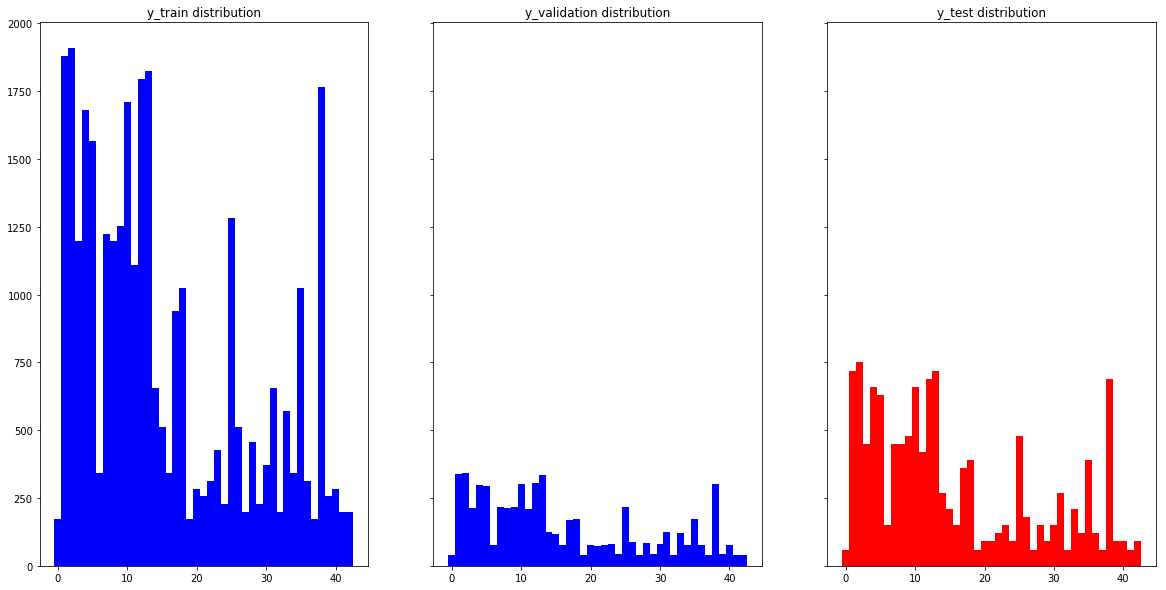

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Pad images with 0s
# X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=5)
i=0
for train_index, test_index in sss.split(X_train, y_train):
    i+=1
    print(i)
    X_train2, X_test2 = X_train[train_index], X_train[test_index]
    y_train2, y_test2 = y_train[train_index], y_train[test_index]

    
X_validation2 = np.concatenate((X_validation,X_test2))
y_validation2 = np.concatenate((y_validation,y_test2))




print("Updated Image Shape: {}".format(X_train[0].shape))

print(type(y_train))
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,10))

unique, counts = np.unique(y_train2, return_counts=True)
#plt.subplot(131)
axes[0].bar(unique, counts, 1, color="blue") 
axes[0].set_title('y_train distribution')
unique, counts = np.unique(y_validation2, return_counts=True)
#plt.subplot(132)
axes[1].bar(unique, counts, 1, color="blue") 
axes[1].set_title('y_validation distribution')
unique, counts = np.unique(y_test, return_counts=True)
#plt.subplot(133)
axes[2].bar(unique, counts, 1, color="red") 
axes[2].set_title('y_test distribution')
plt.show()

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

(32, 32, 3)
(32, 32, 3)
3


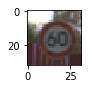

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train2))
print(X_train2[index].shape)
image = X_train2[index].squeeze()
print(image.shape)

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train2[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [15]:
from sklearn.utils import shuffle

X_train2, y_train2 = shuffle(X_train2, y_train2)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [16]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [17]:
from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides=1, padding = 'VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding= padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # Store layers weight & bias

    weights = {
        #'wc1': tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma)),
        #'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16),mean = mu, stddev = sigma)),
        'wc1': tf.Variable(tf.truncated_normal(shape=(5, 3, 3, 6), mean = mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16),mean = mu, stddev = sigma)),
        'wd1': tf.Variable(tf.truncated_normal(shape=(400, 120),mean = mu, stddev = sigma)),
        'wd2': tf.Variable(tf.truncated_normal(shape=(120, 84),mean = mu, stddev = sigma)),
        'wd3': tf.Variable(tf.truncated_normal(shape=(84, 43),mean = mu, stddev = sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([6])),
        'bc2': tf.Variable(tf.truncated_normal([16])),
        'bd1': tf.Variable(tf.truncated_normal([120])),
        'bd2': tf.Variable(tf.truncated_normal([84])),
        'bd3': tf.Variable(tf.truncated_normal([43]))}
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.

    conv1 = conv2d(x, weights['wc1'], biases['bc1'], strides=1)
    conv1 = tf.nn.dropout(conv1, keep_prob )

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxpool2d(conv1, k=2)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(pool1, weights['wc2'], biases['bc2'], strides=1)
    # TODO: Activation.
    conv2 = tf.nn.dropout(conv2, keep_prob2 )
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxpool2d(conv2, k =2)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool2)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.dropout(fc2, keep_prob3 )
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(tf.matmul(fc2, weights['wd3']), biases['bd3'])
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [18]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
keep_prob3 = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [19]:

rate = 0.001
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1, keep_prob2: 1, keep_prob3: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

Training...

EPOCH 1 ...
Train Accuracy = 0.669
Validation Accuracy = 0.579

EPOCH 2 ...
Train Accuracy = 0.585
Validation Accuracy = 0.533

EPOCH 3 ...
Train Accuracy = 0.875
Validation Accuracy = 0.807

EPOCH 4 ...
Train Accuracy = 0.772
Validation Accuracy = 0.718

EPOCH 5 ...
Train Accuracy = 0.837
Validation Accuracy = 0.755

EPOCH 6 ...
Train Accuracy = 0.937
Validation Accuracy = 0.860

EPOCH 7 ...
Train Accuracy = 0.937
Validation Accuracy = 0.855

EPOCH 8 ...
Train Accuracy = 0.895
Validation Accuracy = 0.812

EPOCH 9 ...
Train Accuracy = 0.934
Validation Accuracy = 0.846

EPOCH 10 ...
Train Accuracy = 0.956
Validation Accuracy = 0.866

EPOCH 11 ...
Train Accuracy = 0.841
Validation Accuracy = 0.754

EPOCH 12 ...
Train Accuracy = 0.985
Validation Accuracy = 0.896

EPOCH 13 ...
Train Accuracy = 0.960
Validation Accuracy = 0.872

EPOCH 14 ...
Train Accuracy = 0.874
Validation Accuracy = 0.785

EPOCH 15 ...
Train Accuracy = 0.955
Validation Accuracy = 0.872

EPOCH 16 ...
Train Ac

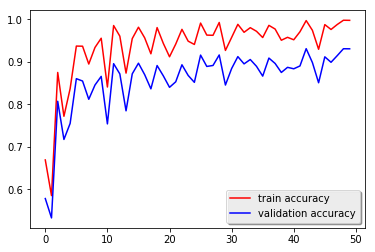

Model saved


In [21]:
train_rate =[]
valid_rate=[]
EPOCHS = 50
rate = 0.001
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train2, y_train2 = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train2[offset:end], y_train2[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1, keep_prob2: 1, keep_prob3: 1})
            

        train_accuracy = evaluate(X_train2, y_train2)
        train_rate.append(train_accuracy)
        validation_accuracy = evaluate(X_validation2, y_validation2)
        valid_rate.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    plt.figure()
    plt.plot(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.plot(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy')
    plt.legend(shadow=True)
    plt.show()
        
    saver.save(sess, './lenet')
    print("Model saved")

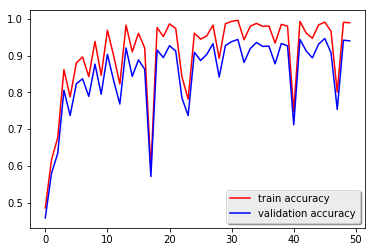

In [82]:
    plt.figure()
    plt.plot(range(EPOCHS), train_rate, 'r', label = 'train accuracy')
    plt.plot(range(EPOCHS), valid_rate, 'b', label = 'validation accuracy')
    plt.legend(shadow=True)
    plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [81]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.884
